# Start of the Life-Expectancy and GDP Project

## Loading in the data

In [3]:
import pandas as pd

all_data = pd.read_csv('all_data.csv')

print(all_data.head(5))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## Exploring the contents of the dataset
In this section I will first load in the necessary dependencies for the project, including plotting functions that will be required to work with this dataset. In addition to this, I will be cleaning the dataset to account for the potential zeros and NaN values in order to proceed with downsteram processing. 


In [3]:
print(all_data.columns)

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


## Understanding the stucture of the data

In [7]:
print('Shape (rows,columns):', all_data.shape)
print('\ninfo:')
print(all_data.info())

print('\nSummary statistics (numeric columns):')
print(all_data.describe())

Shape (rows,columns): (96, 4)

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None

Summary statistics (numeric columns):
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                        

In [8]:
print('Number of countreis:',all_data['Country'].nunique())
print('Countries:', all_data['Country'].unique())

print('\nYear range:')
print('Min year:', all_data['Year'].min())
print('Max year:', all_data['Year'].max())

Number of countreis: 6
Countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']

Year range:
Min year: 2000
Max year: 2015


In [9]:
print(all_data.isna().sum)

<bound method DataFrame.sum of     Country   Year  Life expectancy at birth (years)    GDP
0     False  False                             False  False
1     False  False                             False  False
2     False  False                             False  False
3     False  False                             False  False
4     False  False                             False  False
..      ...    ...                               ...    ...
91    False  False                             False  False
92    False  False                             False  False
93    False  False                             False  False
94    False  False                             False  False
95    False  False                             False  False

[96 rows x 4 columns]>


### Conclusion from the exploratory data analysis 
I run a serires of print statements to better understand the contents of this dataset. 
The commands that I have learned include 
- '\n' which create a new line 
- .min() and .max() for the year
- .unique() for the unique column names of the countries 
- .nunique() from the number of unique enteries of the countries 
- .describe() for the description of the dataset which includes the summary statistic of interest for each column category (min, max, mean, counts, etc)
- .shape for the shape of the data (ex: rows within the columns)
- .info to know the dtypes of data


## Renaming the columns for workability 

In [4]:
all_data = all_data.rename(columns={'Life expectancy at birth (years)': 'life_exp',
'GDP': 'gdp'})

all_data.head()

,Country,Year,life_exp,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Creating log transform of gdp to compress the scale of gdps 

In [5]:
import numpy as np 

all_data['log_gdp'] = np.log(all_data['gdp'])
all_data.head()

,Country,Year,life_exp,gdp,log_gdp
0,Chile,2000,77.3,7.786093e+10,25.078190
1,Chile,2001,77.3,7.097992e+10,24.985663
2,Chile,2002,77.8,6.973681e+10,24.967994
3,Chile,2003,77.9,7.564346e+10,25.049297
4,Chile,2004,78.0,9.921039e+10,25.320509


## Foundational Plots for EDA. 
In this section, I am generating plots for the distribution of GDP and log(GDP) to have a better understanding of the spread of the data across the countires of interest. 

### Histogram of GDP and log GDP 

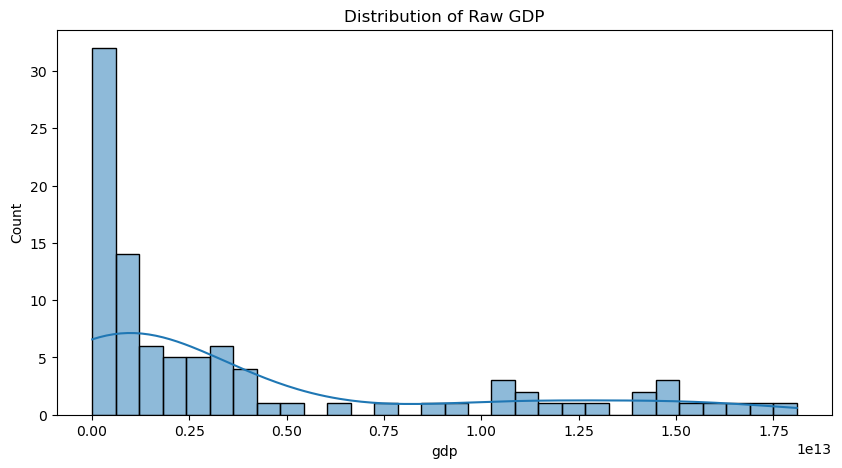

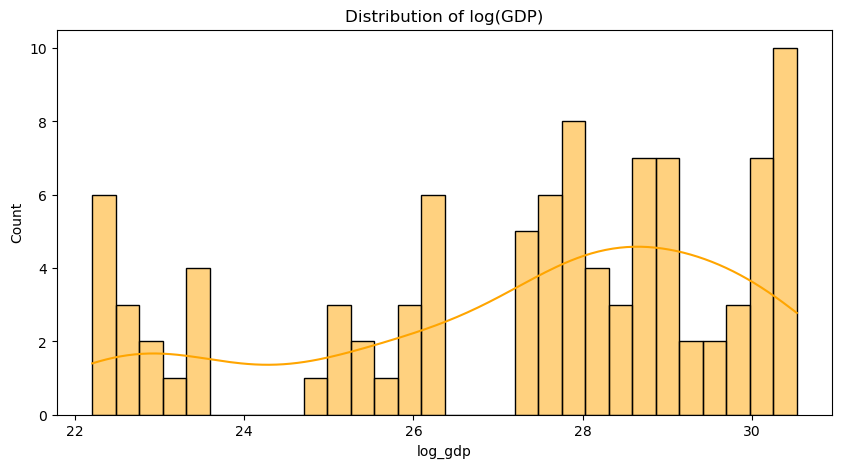

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
sns.histplot(all_data['gdp'],bins=30, kde=True)
plt.title('Distribution of Raw GDP')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(all_data['log_gdp'],bins=30, kde=True, color='orange')
plt.title('Distribution of log(GDP)')
plt.show()

### Scatter plot of Life Expectancy vs GDP

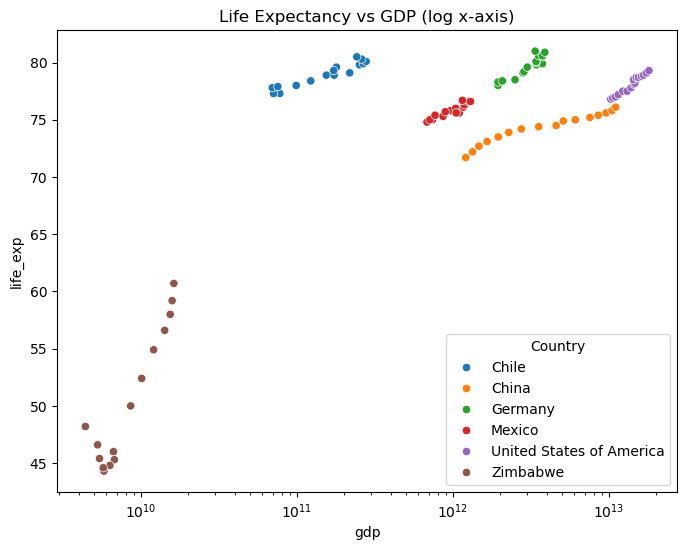

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=all_data,x='gdp',y='life_exp',hue='Country')
plt.xscale('log')
plt.title('Life Expectancy vs GDP (log x-axis)')
plt.show()

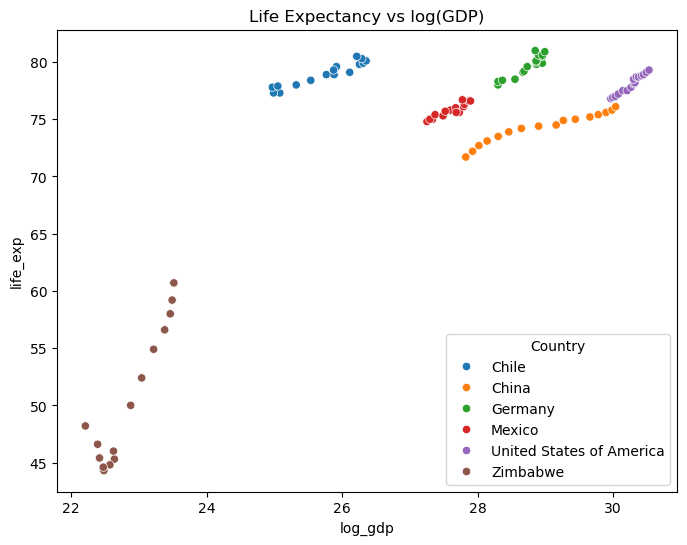

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=all_data, x='log_gdp',y='life_exp',hue='Country')
plt.title('Life Expectancy vs log(GDP)')
plt.show()

## Plotting life expectancy and GDP over time for each of the countries

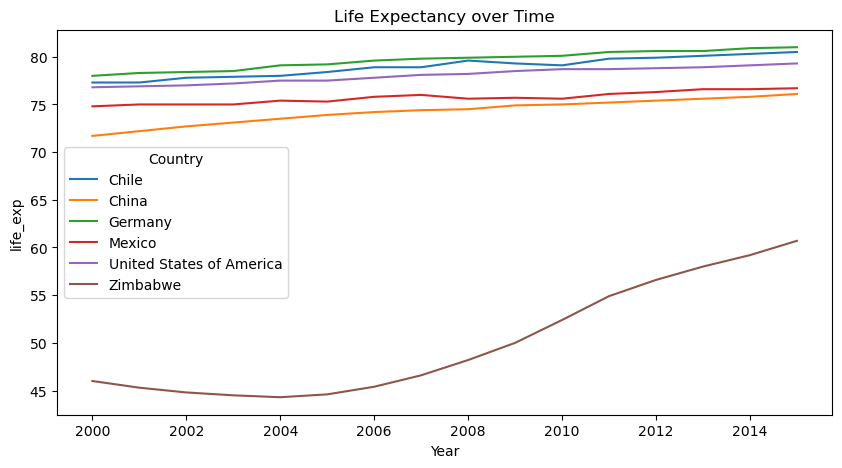

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(data=all_data, x='Year',y='life_exp',hue='Country')
plt.title('Life Expectancy over Time')
plt.show()

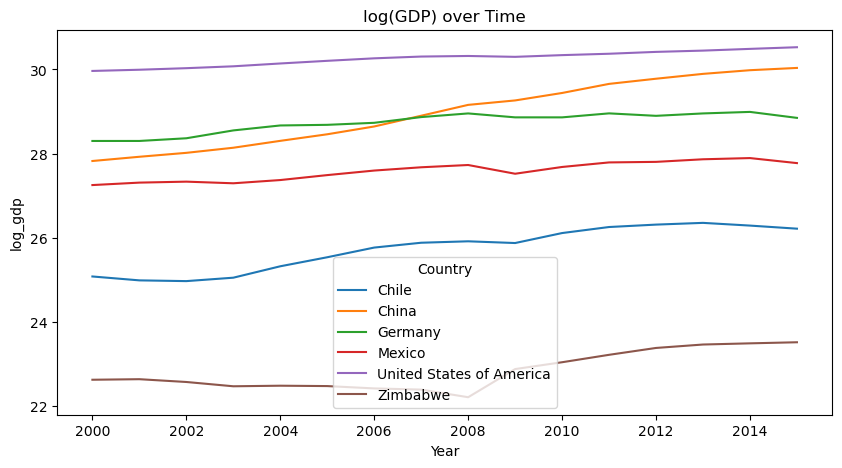

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(data=all_data,x='Year',y='log_gdp',hue='Country')
plt.title('log(GDP) over Time')
plt.show()

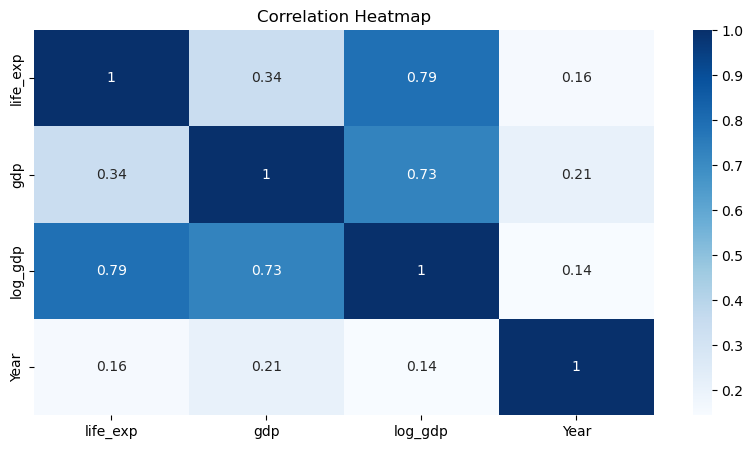

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(all_data[['life_exp','gdp','log_gdp','Year']].corr(),annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

## Creating scatter plots of log GDP by life expectancy for each individual country

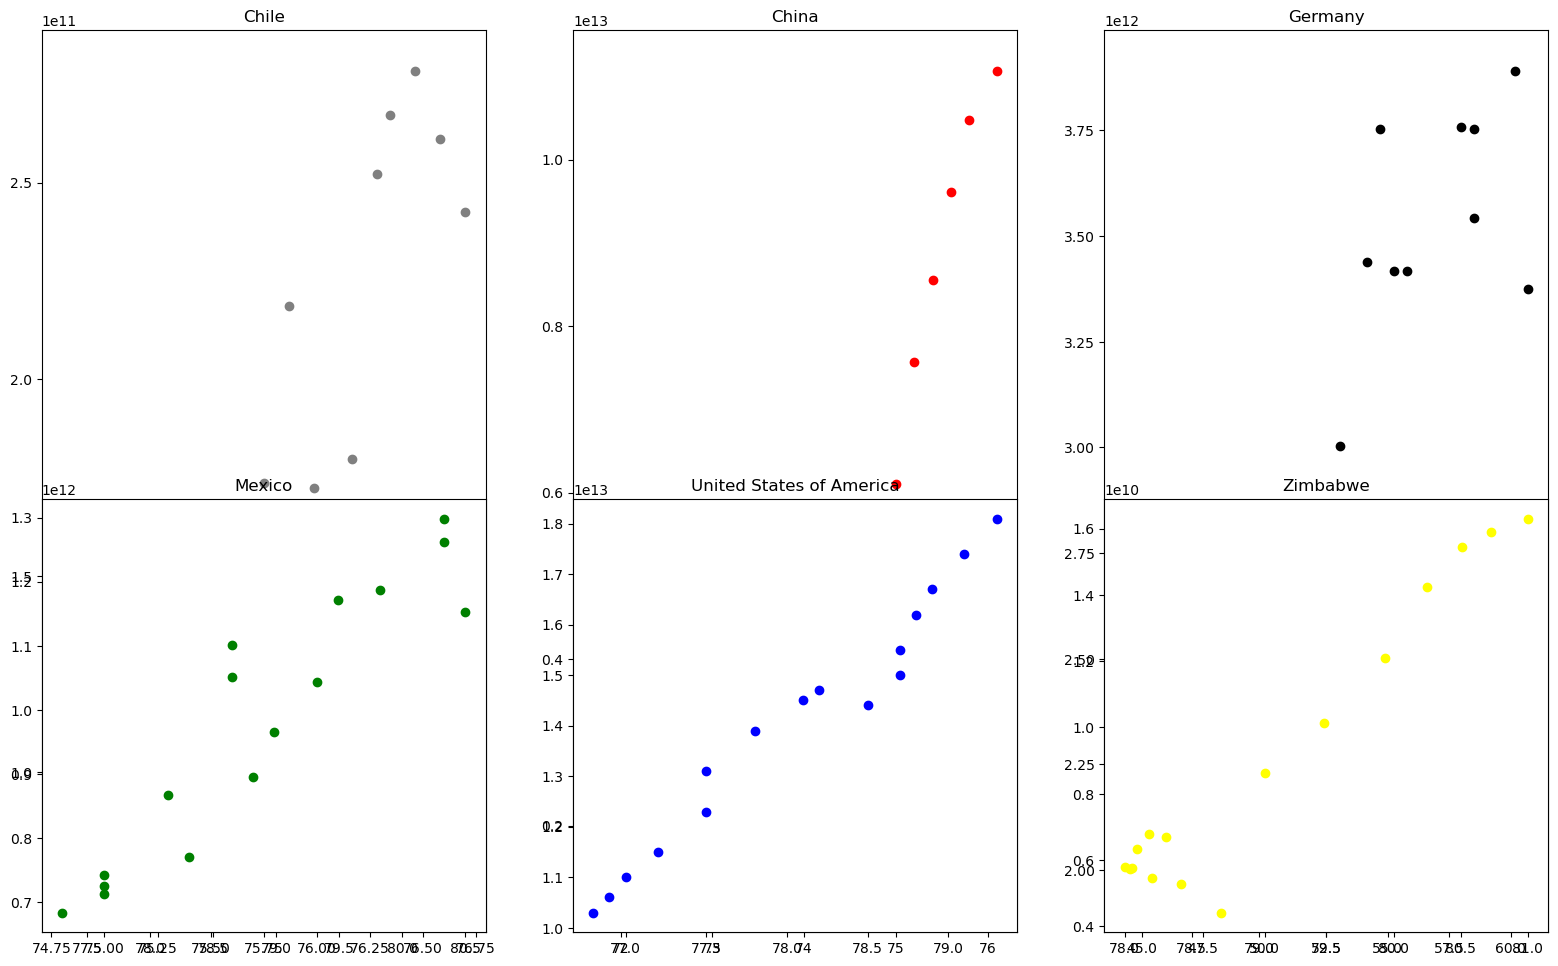

In [27]:
plt.figure(figsize=(16,10))
ax1 = plt.subplot(1,3,1)
chile = all_data[all_data['Country'] == 'Chile']
ax1.scatter(chile['life_exp'], chile['gdp'], color='gray')
ax1.set_title('Chile')

ax2 = plt.subplot(1,3,2)
China = all_data[all_data['Country'] == 'China']
ax2.scatter(China['life_exp'], China['gdp'], color='red')
ax2.set_title('China')

ax3 = plt.subplot(1,3,3)
Germany = all_data[all_data['Country'] == 'Germany']
ax3.scatter(Germany['life_exp'], Germany['gdp'], color='black')
ax3.set_title('Germany')

ax4 = plt.subplot(2,3,4)
Mexico = all_data[all_data['Country'] == 'Mexico']
ax4.scatter(Mexico['life_exp'], Mexico['gdp'], color='green')
ax4.set_title('Mexico')

ax5 = plt.subplot(2,3,5)
usa = all_data[all_data['Country'] == 'United States of America']
ax5.scatter(usa['life_exp'], usa['gdp'], color='blue')
ax5.set_title('United States of America')

ax6 = plt.subplot(2,3,6)
Zimbabwe = all_data[all_data['Country'] == 'Zimbabwe']
ax6.scatter(Zimbabwe['life_exp'], Zimbabwe['gdp'], color='Yellow')
ax6.set_title('Zimbabwe')

plt.subplots_adjust(hspace=1,bottom=0.2)
plt.tight_layout()
plt.show()



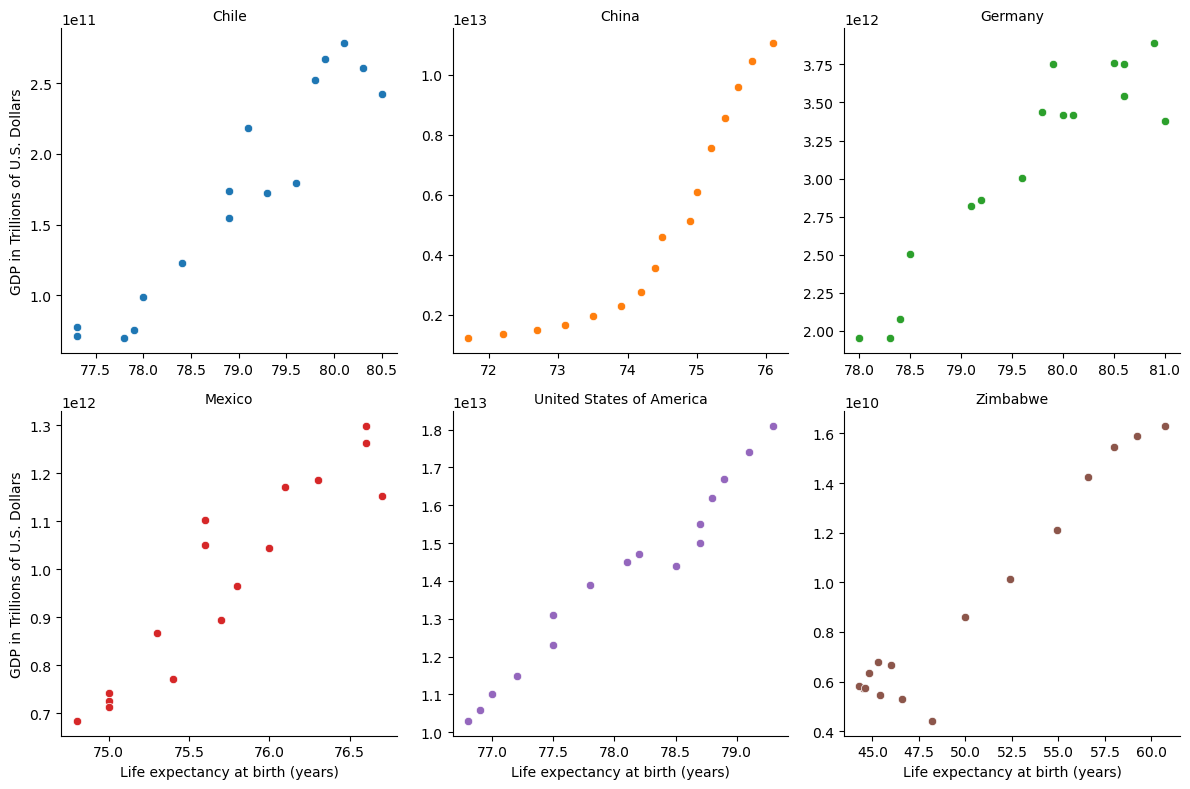

In [22]:
g = sns.FacetGrid(all_data, col='Country',col_wrap=3, height=4, sharex=False, sharey=False,hue='Country')
g.map_dataframe(sns.scatterplot, x='life_exp', y='gdp')

g.set_axis_labels('Life expectancy at birth (years)', 'GDP in Trillions of U.S. Dollars')
g.set_titles(col_template='{col_name}')
g.tight_layout()

plt.show()

## Performing a simple linear regression model to assess the relationship between GDP and life expectancy

In [31]:
import statsmodels.api as sm 

all_data_model = sm.OLS.from_formula('life_exp ~ gdp',data=all_data)
results = all_data_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               life_exp   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     12.55
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           0.000619
Time:                        18:47:35   Log-Likelihood:                -357.00
No. Observations:                  96   AIC:                             718.0
Df Residuals:                      94   BIC:                             723.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.0548      1.286     54.474      0.000      67.501      72.608
gdp         7.048e-13   1.99e-13      3.543      0.001     3.1e-13     1.1e-12
==============================================================================
Omnibus:                       27.107   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.893
Skew:                          -1.444   Prob(JB):                     5.91e-09
Kurtosis:                       4.062   Cond. No.                     8.08e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.08e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

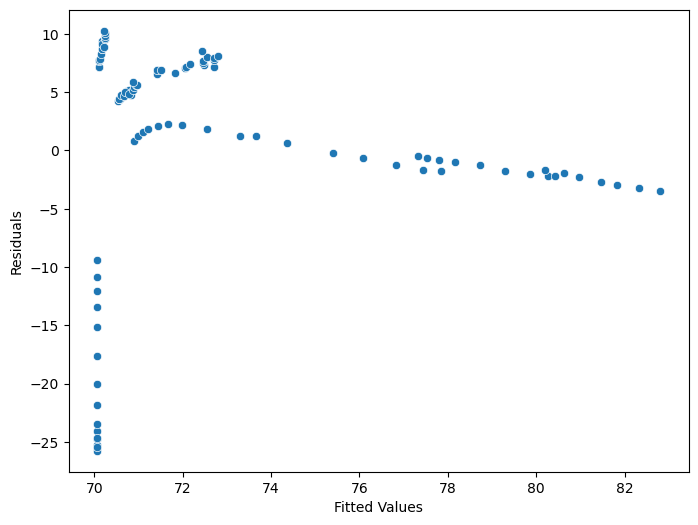

In [33]:
fitted = results.fittedvalues
residuals = results.resid

plt.figure(figsize=(8,6))
sns.scatterplot(x=fitted,y=residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()